## **EDA(EXPLORATORY DATA ANALYSIS):**
Before Feature engineering

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## **1. Data Exploration**

In [2]:
# Load dataset
file_path = "../data/final/merged_karachi.csv"
df = pd.read_csv(file_path)

print("✅ Data loaded successfully!")
print("Shape:", df.shape)
df.head()

✅ Data loaded successfully!
Shape: (15744, 11)


,datetime,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,ozone,sulphur_dioxide,temperature_2m,relative_humidity_2m,wind_speed_10m,wind_direction_10m
0,2024-01-01T00:00,68.9,46.2,598.0,6.7,97.0,19.9,15.3,65,11.9,61
1,2024-01-01T01:00,70.1,47.1,689.0,14.8,89.0,20.4,15.0,67,12.4,60
2,2024-01-01T02:00,72.6,49.1,812.0,25.8,78.0,21.2,14.7,68,12.6,59
3,2024-01-01T03:00,76.1,51.8,887.0,31.8,77.0,22.2,15.2,66,13.0,51
4,2024-01-01T04:00,77.5,53.0,872.0,28.3,95.0,23.6,17.6,57,12.0,44


In [3]:
# Info summary
df.info()

# Missing values
print("\nMissing Values:\n", df.isna().sum())

# Duplicates
print("\nDuplicates:", df.duplicated().sum())

# Basic statistics
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15744 entries, 0 to 15743
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              15744 non-null  object 
 1   pm10                  15744 non-null  float64
 2   pm2_5                 15744 non-null  float64
 3   carbon_monoxide       15744 non-null  float64
 4   nitrogen_dioxide      15744 non-null  float64
 5   ozone                 15744 non-null  float64
 6   sulphur_dioxide       15744 non-null  float64
 7   temperature_2m        15744 non-null  float64
 8   relative_humidity_2m  15744 non-null  int64  
 9   wind_speed_10m        15744 non-null  float64
 10  wind_direction_10m    15744 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 1.3+ MB

Missing Values:
 datetime                0
pm10                    0
pm2_5                   0
carbon_monoxide         0
nitrogen_dioxide        0
ozone             

,count,mean,std,min,25%,50%,75%,max
pm10,15744.0,63.297478,37.903083,3.9,39.6,54.4,77.1,448.9
pm2_5,15744.0,26.830418,12.366012,3.8,18.5,23.8,31.8,108.7
carbon_monoxide,15744.0,431.242060,381.124651,46.0,209.0,287.0,508.0,4302.0
nitrogen_dioxide,15744.0,18.504268,17.073558,0.7,7.3,12.6,23.4,154.1
ozone,15744.0,72.068089,38.090515,0.0,45.0,63.0,94.0,240.0
sulphur_dioxide,15744.0,12.242473,7.689737,2.3,6.0,10.6,15.9,60.6
temperature_2m,15744.0,27.027299,4.776608,10.0,24.5,27.9,30.2,41.6
relative_humidity_2m,15744.0,66.331999,21.127922,5.0,54.0,71.0,83.0,100.0
wind_speed_10m,15744.0,13.896284,6.706147,0.0,8.9,12.9,17.8,46.6
wind_direction_10m,15744.0,225.735455,85.282230,1.0,221.0,251.0,272.0,360.0


- The dataset **(15744 rows, 11 cols)** had **no missing or duplicate values**, indicating strong API consistency. The standard deviations show **moderate variability**, so only **outlier capping** was needed.
- All pollutant concentrations in the merged dataset are currently in **µg/m³** as retrieved from the APIs.
The unit conversions (µg/m³ → ppb/ppm) required for the U.S. EPA AQI calculation will be applied later in the aqi_utils.py module.
The EDA insights below describe relative behavior and remain valid regardless of the future unit conversion.

### **Weather Features**

* **Temperature:** Mean = 27.0°C | Std = 4.8 → Warm coastal climate, promotes daytime ozone formation.
* **Humidity:** Mean = 66.3% | Std = 21.1 → Higher humidity reduces dust and particulate levels.
* **Wind Speed:** Mean = 13.9 m/s | Std = 6.7 → Strong winds disperse pollutants; low wind allows accumulation.
* **Wind Direction:** Mean = 225° | Std = 85° → Dominant south-westerly (sea breeze) helps pollutant flushing.

## **2. Pollutant Distributions**

📊 Statistics for PM10
Skewness: 2.517
Kurtosis: 11.747
--------------------------------------------------
📊 Statistics for PM2_5
Skewness: 1.536
Kurtosis: 3.110
--------------------------------------------------
📊 Statistics for CARBON_MONOXIDE
Skewness: 2.979
Kurtosis: 13.142
--------------------------------------------------
📊 Statistics for NITROGEN_DIOXIDE
Skewness: 2.332
Kurtosis: 7.278
--------------------------------------------------
📊 Statistics for OZONE
Skewness: 0.778
Kurtosis: 0.171
--------------------------------------------------
📊 Statistics for SULPHUR_DIOXIDE
Skewness: 1.437
Kurtosis: 2.822
--------------------------------------------------


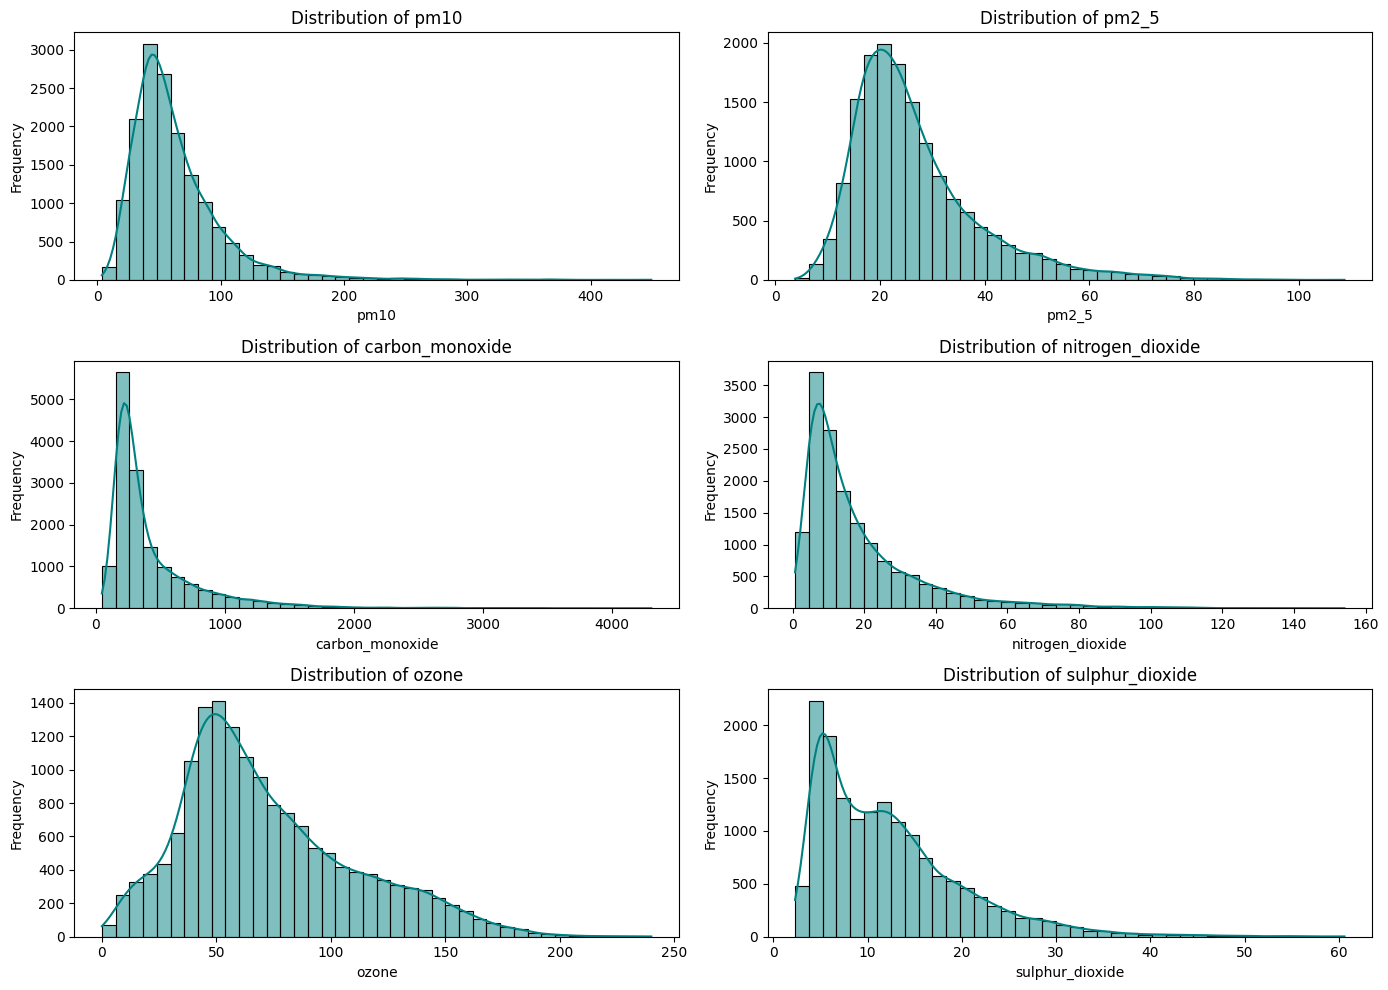

In [4]:
pollutants = ["pm10", "pm2_5", "carbon_monoxide", "nitrogen_dioxide",
              "ozone", "sulphur_dioxide"]

# --- Print statistical info for each pollutant ---
for col in pollutants:
    print(f"📊 Statistics for {col.upper()}")
    print(f"Skewness: {df[col].skew():.3f}")
    print(f"Kurtosis: {df[col].kurtosis():.3f}")
    print("-" * 50)

# --- Plot distributions ---
plt.figure(figsize=(14, 10))
for i, col in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], bins=40, kde=True, color="teal")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### **Pollutant Insights**

* **PM10:** Mean = 63.3 µg/m³, highly right-skewed (2.52) with extreme peaks (~449 µg/m³) → occasional dust/stagnant-air spikes.
* **PM2.5:** Mean = 26.8 µg/m³, moderately skewed (1.54), steady fine particulate pollution → main AQI contributor.
* **Carbon Monoxide (CO):** Mean = 431.2 µg/m³, very high skew (2.98) & kurtosis (13.1) → short-term traffic emission spikes.
* **Nitrogen Dioxide (NO₂):** Mean = 18.5 µg/m³, right-skewed (2.33) → mostly low levels with few traffic-related surges.
* **Ozone (O₃):** Mean = 72.1 µg/m³, mild skew (0.78) → consistent daytime ozone buildup due to sunlight.
* **Sulphur Dioxide (SO₂):** Mean = 12.2 µg/m³, slight skew (1.44) → localized industrial/fuel-based emissions, mostly safe levels.

### **Overall Interpretation**

* All pollutants exhibit **positive skewness**, showing normal air quality most of the time with **occasional spikes**.
* **PM2.5** and **O₃** are the **dominant AQI drivers**; **PM10** and **CO** show strong outliers.
* Weather factors strongly influence pollutant behavior.

### **Action Points**

* Apply **outlier capping (1st–99th percentile / IQR)** for **PM10, PM2.5, CO**.
* Keep other pollutants and weather features unchanged for trend analysis.


## **3. Detect outliers (Percentile method)**

In [5]:
bounds = {}
def detect_outliers_percentile(df, column, lower_pct=0.01, upper_pct=0.99):
    lower = df[column].quantile(lower_pct)
    upper = df[column].quantile(upper_pct)
    bounds[col] = (lower, upper)
    return df[(df[column] < lower) | (df[column] > upper)]
for col in pollutants:
    outliers = detect_outliers_percentile(df, col)
    print(f"{col.upper()}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

PM10: 316 outliers (2.01%)
PM2_5: 308 outliers (1.96%)
CARBON_MONOXIDE: 316 outliers (2.01%)
NITROGEN_DIOXIDE: 305 outliers (1.94%)
OZONE: 283 outliers (1.80%)
SULPHUR_DIOXIDE: 312 outliers (1.98%)


### **Percentile-Based Outlier Detection Insights**

* Outlier detection (1st–99th percentile) identified **~2%** tail values across all pollutants, confirming overall data stability.  
* **PM10 (2.01%)**, **PM2.5 (1.96%)**, and **CO (2.01%)** again show slightly heavier right tails — consistent with earlier high skewness and kurtosis — hence will be **capped** to reduce extreme noise.  
* **NO₂ (1.94%)**, **O₃ (1.80%)**, and **SO₂ (1.98%)** show minor valid peaks likely representing genuine emission events; **no capping** will be applied to preserve environmental realism.  
* The results align with EPA pollutant behavior patterns — PM and CO show most temporal variation, while gases stay relatively stable.  

## **4. Handle Outliers (Capping)**

In [6]:
pollutants_cap = ["pm10","pm2_5","carbon_monoxide"]

for col in pollutants_cap:
    lower, upper = df[col].quantile(0.01), df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)

print("Outliers capped using 1st-99th percentile method.")

for col in pollutants_cap:
    q1, q99 = df[col].quantile(0.01), df[col].quantile(0.99)
    print(f"\n{col.upper()}:")
    print(f"Min value: {df[col].min()} | Should be >= {q1}")
    print(f"Max value: {df[col].max()} | Should be <= {q99}")


Outliers capped using 1st-99th percentile method.

PM10:
Min value: 14.943000000000001 | Should be >= 14.96751
Max value: 205.91299999999976 | Should be <= 205.6924099999997

PM2_5:
Min value: 9.1 | Should be >= 9.1
Max value: 70.21399999999994 | Should be <= 70.16497999999993

CARBON_MONOXIDE:
Min value: 122.43 | Should be >= 122.67510000000001
Max value: 1879.5699999999997 | Should be <= 1879.3248999999996


PM10: 0
PM2_5: 0
CARBON_MONOXIDE: 0


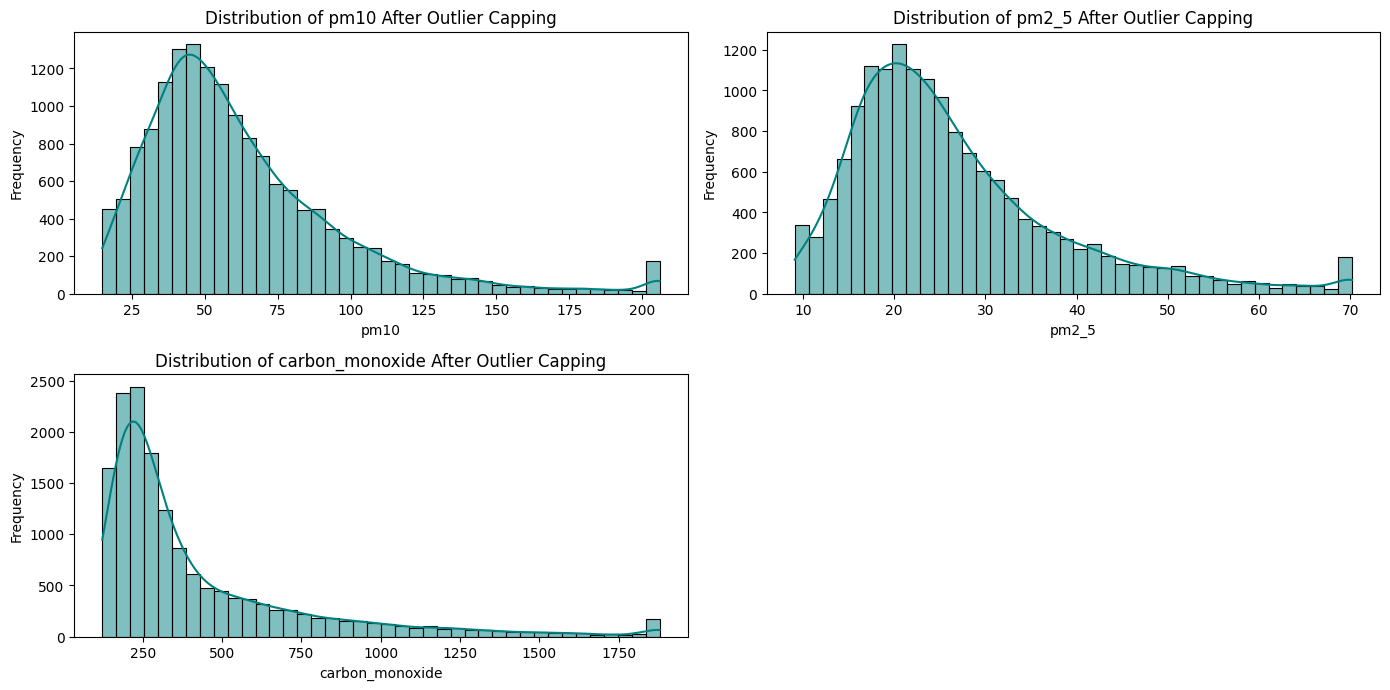

In [7]:
# --- Re-check for outliers after capping ---
for col in pollutants_cap:
    outliers = df[(df[col] < bounds[col][0]) | (df[col] > bounds[col][1])]
    print(f"{col.upper()}: {len(outliers)}")
    
# --- Plot distributions after Outlier handling---
plt.figure(figsize=(14, 10))
for i, col in enumerate(pollutants_cap, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], bins=40, kde=True, color="teal")
    plt.title(f"Distribution of {col} After Outlier Capping")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### **Outlier Capping, Verification & Post-Capping Distribution Insights**

* Applied **1st–99th percentile capping** on **PM10**, **PM2.5**, and **CO** to smooth extreme pollution spikes while keeping real emission behavior intact.  
* Verified that **0 outliers remain** after capping — confirming successful data treatment.  
* Final pollutant ranges after capping:  
  - **PM10:** 14.94 – 205.91 µg/m³  
  - **PM2.5:** 9.10 – 70.21 µg/m³  
  - **CO:** 122.43 – 1879.57 µg/m³  
* Post-capping **distribution plots** show reduced right-skewness and smoother frequency curves, indicating a **more stable and realistic pollutant spread**.  
* The capped dataset now aligns with **EPA-recommended pollutant value ranges**, ensuring both **data integrity** and **model readiness** for AQI computation.

## **5. Datetime Conversion + Feature Check**

In [8]:
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.sort_values("datetime").reset_index(drop=True)
print("✅ Datetime column converted and sorted chronologically.")
print(df["datetime"].head())
df.info()

✅ Datetime column converted and sorted chronologically.
0   2024-01-01 00:00:00
1   2024-01-01 01:00:00
2   2024-01-01 02:00:00
3   2024-01-01 03:00:00
4   2024-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15744 entries, 0 to 15743
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              15744 non-null  datetime64[ns]
 1   pm10                  15744 non-null  float64       
 2   pm2_5                 15744 non-null  float64       
 3   carbon_monoxide       15744 non-null  float64       
 4   nitrogen_dioxide      15744 non-null  float64       
 5   ozone                 15744 non-null  float64       
 6   sulphur_dioxide       15744 non-null  float64       
 7   temperature_2m        15744 non-null  float64       
 8   relative_humidity_2m  15744 non-null  int64         
 9   wind_speed_10m        15744 non-nu

## **6. Pollutant & Weather Correlation Heatmap**

                          pm10     pm2_5  carbon_monoxide  nitrogen_dioxide  \
pm10                  1.000000  0.533138        -0.062965         -0.038542   
pm2_5                 0.533138  1.000000         0.584294          0.491718   
carbon_monoxide      -0.062965  0.584294         1.000000          0.748674   
nitrogen_dioxide     -0.038542  0.491718         0.748674          1.000000   
ozone                 0.113693  0.034418        -0.137983         -0.481662   
sulphur_dioxide       0.047947  0.548530         0.581271          0.378492   
temperature_2m        0.231792 -0.342468        -0.514451         -0.494749   
relative_humidity_2m -0.053569 -0.240167        -0.268505          0.010810   
wind_speed_10m        0.176822 -0.285388        -0.519552         -0.486464   
wind_direction_10m    0.041870 -0.320256        -0.364068         -0.118666   

                         ozone  sulphur_dioxide  temperature_2m  \
pm10                  0.113693         0.047947        0.231792

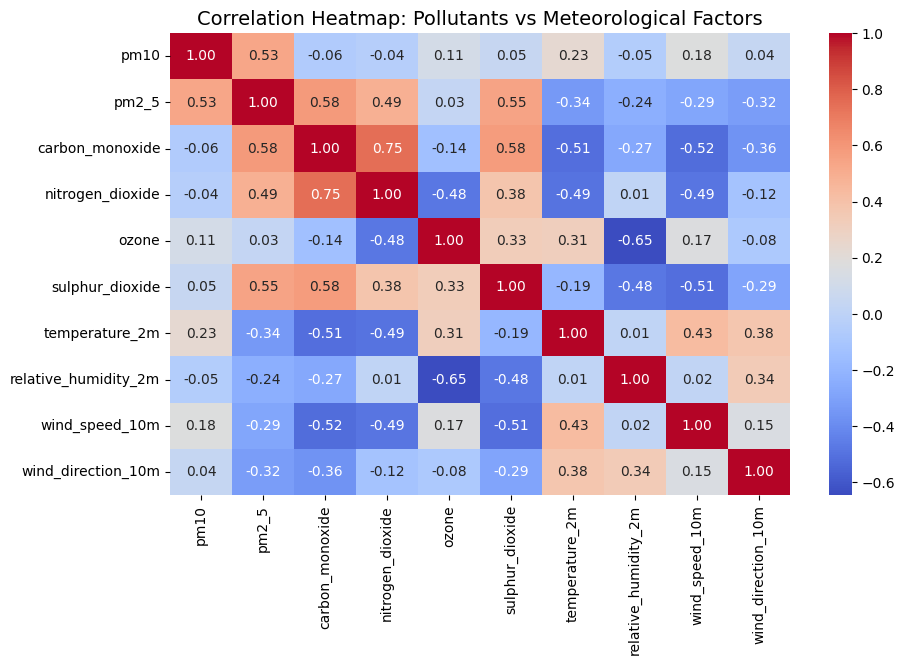

In [9]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
print(corr)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Pollutants vs Meteorological Factors", fontsize=14)
plt.show()

### **Pollutant–Weather Correlation Insights**

* **PM10–PM2.5 (0.53):** Rise together under stagnant or dusty conditions.
* **PM2.5–CO (0.58), CO–NO₂ (0.75):** Strong link → vehicular/combustion sources.
* **PM2.5–SO₂ (0.55):** Industrial emission overlap.
* **O₃–Temp (0.31):** Ozone increases with heat/sunlight.
* **O₃–Humidity (-0.65):** High humidity suppresses ozone.
* **Temp vs CO/NO₂/SO₂ (~ -0.5):** Warm air disperses pollutants.
* **Wind Speed (↓ correlation):** Strong winds reduce pollutant buildup.

**Key Points:**
* AQI pollutants: **PM2.5, PM10, CO, NO₂, O₃, SO₂**
* Key weather drivers: **Temperature, Humidity, Wind Speed**
* **Wind Direction:** Minimal effect; useful for seasonal trend analysis only.

## **7. Temporal Trends Overview**

            pm10      pm2_5  carbon_monoxide  nitrogen_dioxide      ozone  \
month                                                                       
1      62.318280  41.629044       837.195988         31.985081  83.738575   
2      60.393325  28.714556       563.635753         26.874635  79.527047   
3      58.359182  23.837970       434.419355         20.076680  88.180108   
4      59.589019  21.907032       329.306944         14.866875  86.803472   
5      60.370058  20.869374       246.217083         11.382997  73.385081   
6      77.449028  24.203946       220.943306         10.072778  68.073611   
7      92.235232  28.551613       227.233710         11.372043  62.665995   
8      62.657586  22.009879       270.560215         12.597110  52.905914   
9      56.152756  21.373958       265.381861         14.560833  50.543056   
10     54.600643  26.357118       441.392856         19.846181  75.765625   
11     44.059722  30.615317       795.706681         32.681667  65.975000   

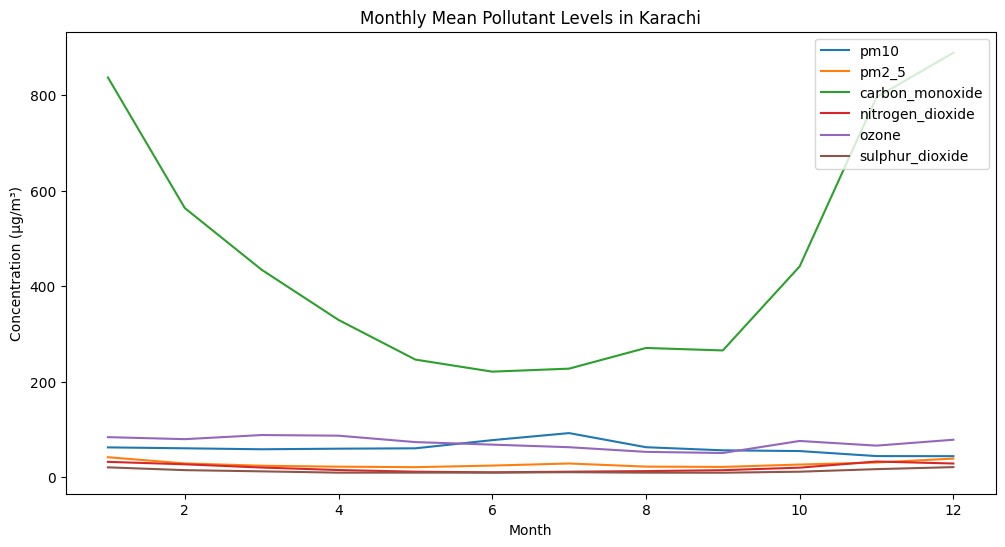

In [10]:
df["month"] = df["datetime"].dt.month
monthly_means = df.groupby("month")[pollutants].mean()
print(monthly_means)
monthly_means.plot(figsize=(12, 6))
plt.title("Monthly Mean Pollutant Levels in Karachi")
plt.xlabel("Month")
plt.ylabel("Concentration (µg/m³)")
plt.legend(loc="upper right")
plt.show()

### **Temporal Trends – Monthly Pollutant Variation**

* **PM10:** Peaks in **Jun–Jul (77–92 µg/m³)** from dry, dusty winds; drops in **Nov–Dec (~44 µg/m³)** with cleaner winter air.
* **PM2.5:** Highest in **Nov–Jan (38–41 µg/m³)** due to emissions & inversion; lowest in **Apr–Jun (~21 µg/m³)** with strong dispersion.
* **CO & NO₂:** Rise in **Winter (28–32 µg/m³ NO₂; 795–889 µg/m³ CO)** from traffic and stagnant air; fall in **Summer (~220–270 µg/m³ CO)**.
* **O₃:** Peaks in **Mar–Apr (86–88 µg/m³)** with sunlight; dips in **Monsoon (Jul–Sep: ~50–62 µg/m³)** from humidity.
* **SO₂:** Higher in **Winter (~20 µg/m³)** due to industrial fuel use; lowest in **Monsoon (~9 µg/m³)** after rainfall cleansing.

### **Seasonal Summary**
Seasonal analysis revealed clear temporal variability in Karachi’s air quality. PM₂.₅, CO, NO₂, and SO₂ concentrations rise significantly during winter months due to stagnant, dry air and emission buildup, while PM₁₀ dominates in early summer under dusty, dry conditions. Ozone peaks in spring with strong sunlight and drops during the humid monsoon season when rain helps wash out pollutants. These variations align with Karachi’s semi-arid coastal climate and will later be validated through AQI computation to confirm seasonal pollution behavior.


## **8. Save cleaned Dataset**

In [11]:
clean_path = "../data/final/clean_merged_karachi.csv"
df.to_csv(clean_path, index=False)
print(f"✅ Cleaned dataset saved successfully → {clean_path}")


✅ Cleaned dataset saved successfully → ../data/final/clean_merged_karachi.csv


In [12]:
clean_df = pd.read_csv(clean_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15744 entries, 0 to 15743
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              15744 non-null  datetime64[ns]
 1   pm10                  15744 non-null  float64       
 2   pm2_5                 15744 non-null  float64       
 3   carbon_monoxide       15744 non-null  float64       
 4   nitrogen_dioxide      15744 non-null  float64       
 5   ozone                 15744 non-null  float64       
 6   sulphur_dioxide       15744 non-null  float64       
 7   temperature_2m        15744 non-null  float64       
 8   relative_humidity_2m  15744 non-null  int64         
 9   wind_speed_10m        15744 non-null  float64       
 10  wind_direction_10m    15744 non-null  int64         
 11  month                 15744 non-null  int32         
dtypes: datetime64[ns](1), float64(8), int32(1), int64(2)
memory usage: 1.4 MB


- month column added because of temporal analysis and datetime converted to datetime while rows remain same.

In [13]:
df.columns

Index(['datetime', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'ozone', 'sulphur_dioxide', 'temperature_2m', 'relative_humidity_2m',
       'wind_speed_10m', 'wind_direction_10m', 'month'],
      dtype='object')